<a href="https://colab.research.google.com/github/Avishkarp231/Stock-Forcasting-analysis-using-NLP-Models/blob/main/Lr_of_sf_adaniport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 128 kB 28.2 MB/s 
     |████████████████████████████████| 112 kB 75.9 MB/s 
     |████████████████████████████████| 110 kB 81.5 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 4.0 MB 64.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
stocksdata="AAPL"
df=yf.download(stocksdata,start="1981-1-1",end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10086 entries, 1981-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10086 non-null  float64
 1   High       10086 non-null  float64
 2   Low        10086 non-null  float64
 3   Close      10086 non-null  float64
 4   Adj Close  10086 non-null  float64
 5   Volume     10086 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 551.6 KB


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

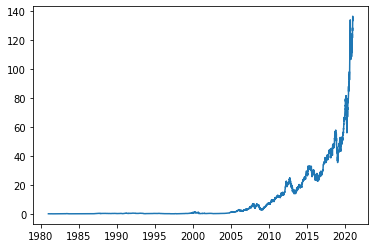

In [ ]:
plt.plot(df['Close'])

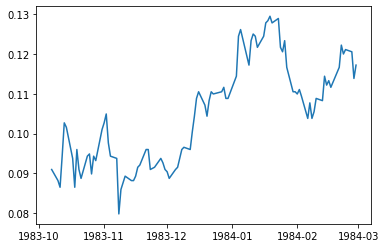

In [ ]:
plt.plot(df[700:800]['Close'])

In [ ]:
df1 = df['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[7.67786241e-04],
       [7.43284112e-04],
       [6.94272329e-04],
       ...,
       [1.00000000e+00],
       [9.86680362e-01],
       [9.78264185e-01]])

In [ ]:
def data_creater(df,a):
    row = [];
    Y = [];
    for i in range(len(df)-a-1):
        row.append(df[i:(i+a),0])
        Y.append(df[i+a,0])
    
    return np.array(row), np.array(Y)

In [ ]:
a=10;
X,Y = data_creater(df1,a)

In [ ]:
X

array([[7.67786241e-04, 7.43284112e-04, 6.94272329e-04, ...,
        6.37100621e-04, 6.41184345e-04, 6.61602859e-04],
       [7.43284112e-04, 6.94272329e-04, 6.49351685e-04, ...,
        6.41184345e-04, 6.61602859e-04, 6.53435410e-04],
       [6.94272329e-04, 6.49351685e-04, 6.28933281e-04, ...,
        6.61602859e-04, 6.53435410e-04, 7.14690842e-04],
       ...,
       [9.01566771e-01, 8.95492497e-01, 8.90881836e-01, ...,
        9.38085837e-01, 9.64798258e-01, 9.58065294e-01],
       [8.95492497e-01, 8.90881836e-01, 9.35524389e-01, ...,
        9.64798258e-01, 9.58065294e-01, 9.65456892e-01],
       [8.90881836e-01, 9.35524389e-01, 9.35012100e-01, ...,
        9.58065294e-01, 9.65456892e-01, 1.00000000e+00]])

In [ ]:
Y

array([6.53435410e-04, 7.14690842e-04, 6.82021264e-04, ...,
       9.65456892e-01, 1.00000000e+00, 9.86680362e-01])

In [ ]:
df1[10]

array([0.00065344])

In [ ]:
df1[0:10]

array([[0.00076779],
       [0.00074328],
       [0.00069427],
       [0.00064935],
       [0.00062893],
       [0.00068202],
       [0.00067385],
       [0.0006371 ],
       [0.00064118],
       [0.0006616 ]])

In [ ]:
df1[1:11]

array([[0.00074328],
       [0.00069427],
       [0.00064935],
       [0.00062893],
       [0.00068202],
       [0.00067385],
       [0.0006371 ],
       [0.00064118],
       [0.0006616 ],
       [0.00065344]])

In [ ]:
X.shape,Y.shape

((10075, 10), (10075,))

In [ ]:
X_train = X[0:int(X.shape[0]*0.8)]
Y_train = Y[0:int(Y.shape[0]*0.8)]

In [ ]:
X_test = X[int(X.shape[0]*0.8):-1]
Y_test = Y[int(Y.shape[0]*0.8):-1]

In [ ]:
Y_test.shape,X_test.shape

((2014,), (2014, 10))

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

In [ ]:
models

In [ ]:
predictions

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred,Y_test)

0.9981085603694004

In [ ]:
pred_1 = scaler.inverse_transform(pred.reshape(-1,1))

In [ ]:
pred_1

array([[ 18.35632797],
       [ 18.22078625],
       [ 19.0183075 ],
       ...,
       [132.33776147],
       [130.39033774],
       [132.02608106]])

In [ ]:
df1

array([[7.67786241e-04],
       [7.43284112e-04],
       [6.94272329e-04],
       ...,
       [1.00000000e+00],
       [9.86680362e-01],
       [9.78264185e-01]])

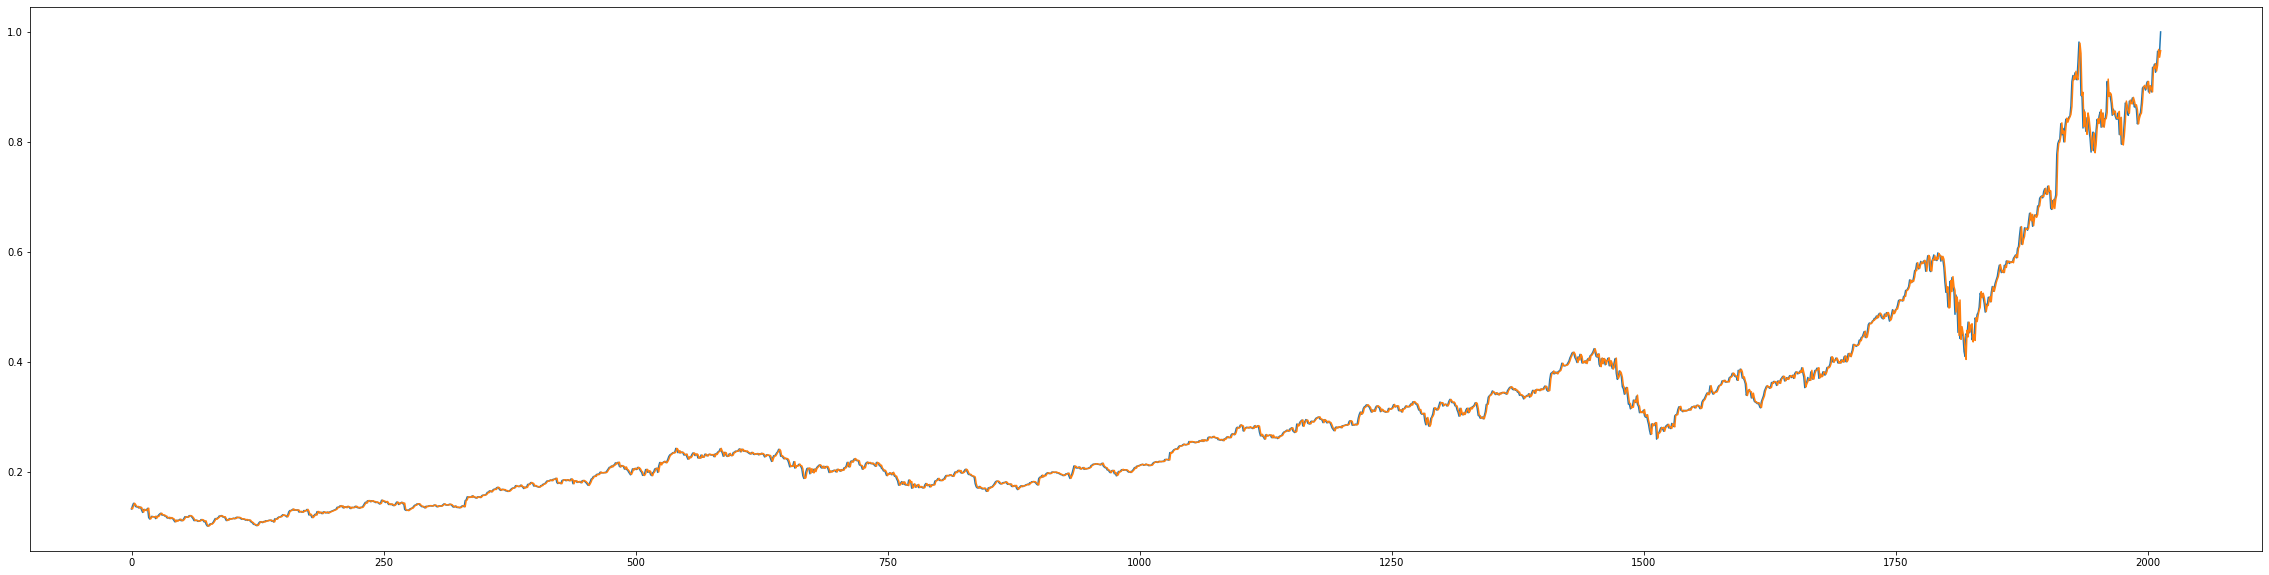

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(40)

plt.plot(Y_test)
plt.plot(pred)
plt.show()

In [ ]:
Y_nw = np.append(Y_train,pred)

In [ ]:
Y_test_org = scaler.inverse_transform(Y_test.reshape(-1,1))

In [ ]:
Y_org =  scaler.inverse_transform(Y.reshape(-1,1))

In [ ]:
Y_nw_org =  scaler.inverse_transform(Y_nw.reshape(-1,1))

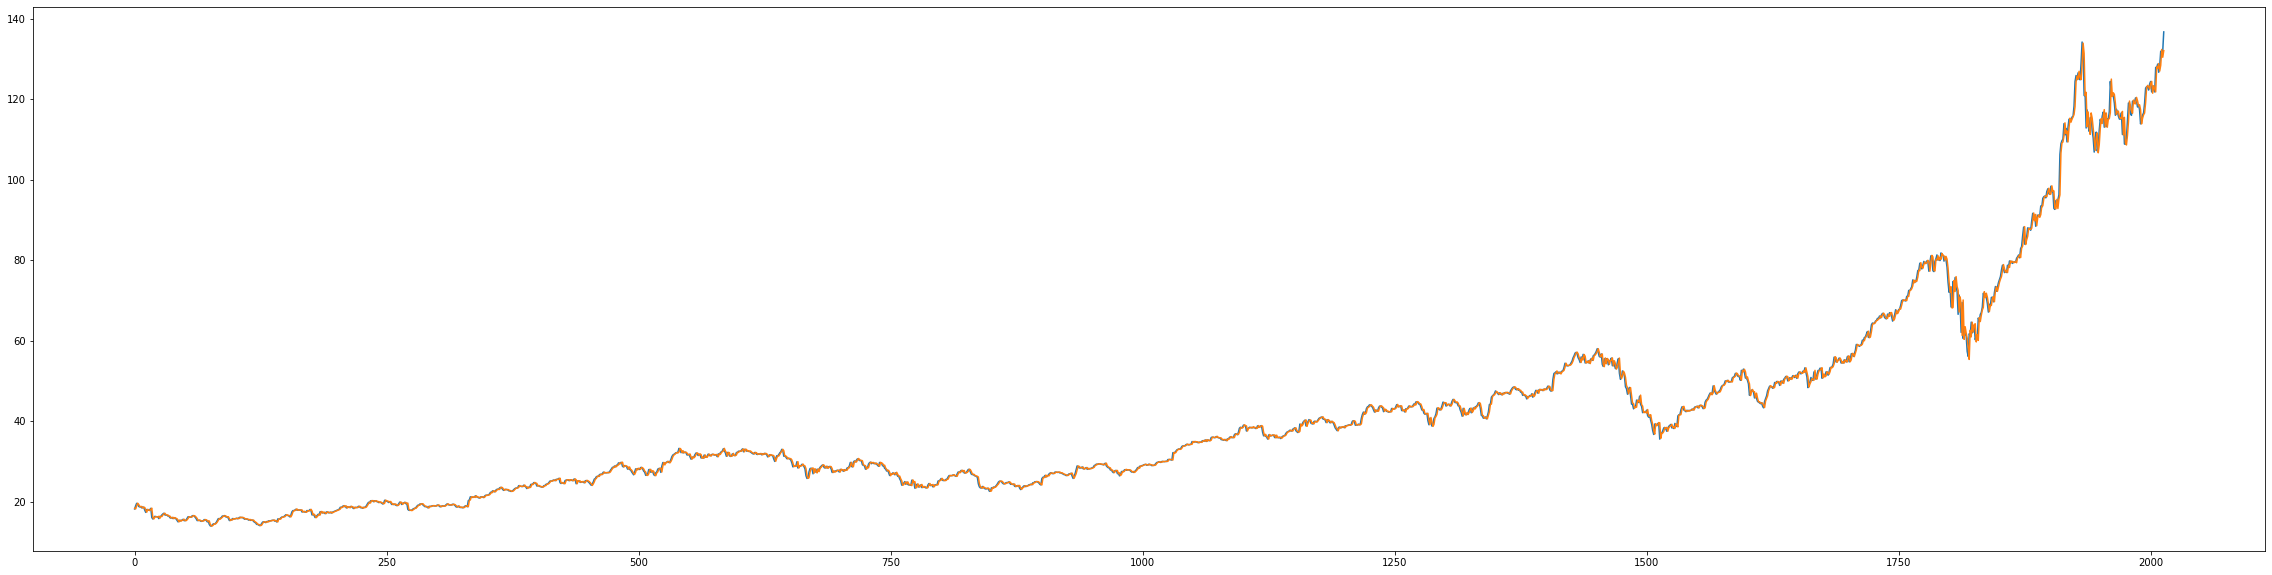

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(40)

plt.plot(Y_test_org)
plt.plot(pred_1)
plt.show()

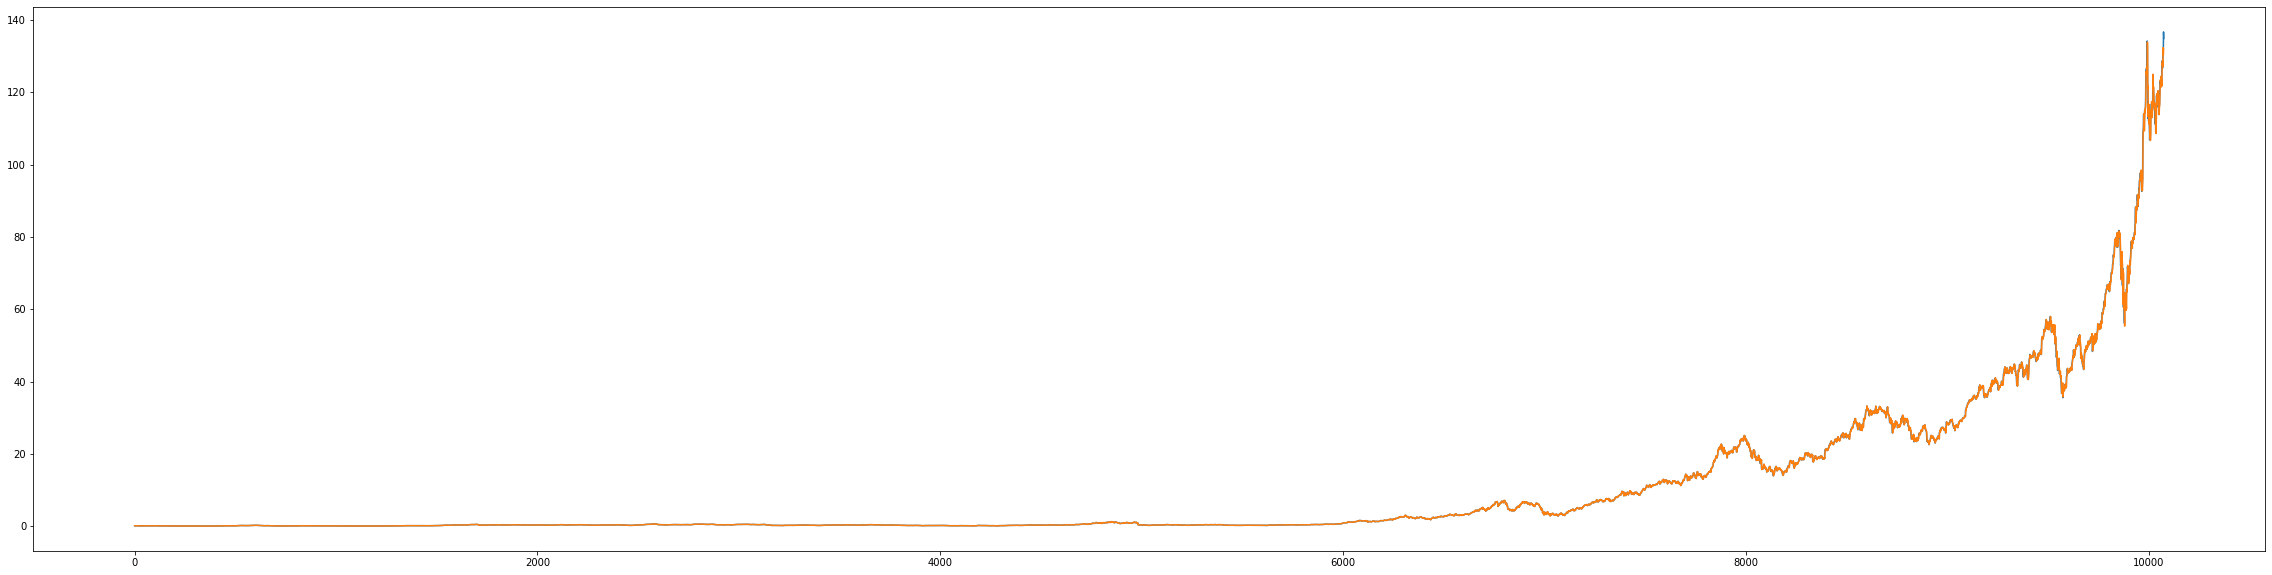

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(40)

plt.plot(Y_org)
plt.plot(Y_nw_org)
plt.show()

In [ ]:
Y_nw_org.shape

(10074, 1)

In [ ]:
Y_org.shape

(10075, 1)

In [ ]:
Y_nw_org

array([[  0.138393  ],
       [  0.146763  ],
       [  0.142299  ],
       ...,
       [132.33776147],
       [130.39033774],
       [132.02608106]])

In [ ]:
Y_org

array([[  0.138393  ],
       [  0.146763  ],
       [  0.142299  ],
       ...,
       [131.97000122],
       [136.69000244],
       [134.86999512]])

In [ ]:
X_test.shape,Y_test.shape

((2014, 10), (2014,))

In [ ]:
pred.shape

(2014,)

In [ ]:
y_nextday = lr.predict(X_test[-1].reshape(1,-1))
X_next = np.append(X_test[-1],y_nextday)
y_new = Y

In [ ]:
for i in range(253):
  y_nextday = lr.predict(X_next[1+i:101+i].reshape(1,-1))
  X_next = np.append(X_next,y_nextday)
  y_new = np.append(y_new,y_nextday)
  print(y_nextday)

[0.96673944]
[0.96841692]
[0.96973279]
[0.96809995]
[0.96901062]
[0.96906945]
[0.96976159]
[0.97021134]
[0.97078124]
[0.9712062]
[0.97198148]
[0.97257133]
[0.9732406]
[0.97383143]
[0.97446586]
[0.97507506]
[0.97571368]
[0.97631597]
[0.97693373]
[0.97754137]
[0.9781595]
[0.97877215]
[0.97938898]
[0.98000198]
[0.98061906]
[0.98123499]
[0.98185279]
[0.98246974]
[0.9830878]
[0.98370572]
[0.98432456]
[0.98494342]
[0.98556285]
[0.98618246]
[0.98680261]
[0.98742305]
[0.98804395]
[0.98866517]
[0.98928681]
[0.98990882]
[0.99053124]
[0.99115403]
[0.99177721]
[0.99240078]
[0.99302474]
[0.99364908]
[0.99427382]
[0.99489894]
[0.99552445]
[0.99615035]
[0.99677664]
[0.99740332]
[0.99803038]
[0.99865784]
[0.99928569]
[0.99991393]
[1.00054256]
[1.00117158]
[1.00180099]
[1.00243079]
[1.00306098]
[1.00369157]
[1.00432255]
[1.00495392]
[1.00558568]
[1.00621783]
[1.00685038]
[1.00748332]
[1.00811666]
[1.00875039]
[1.00938451]
[1.01001903]
[1.01065394]
[1.01128925]
[1.01192495]
[1.01256104]
[1.01319754]
[1.

[*********************100%***********************]  1 of 1 completed


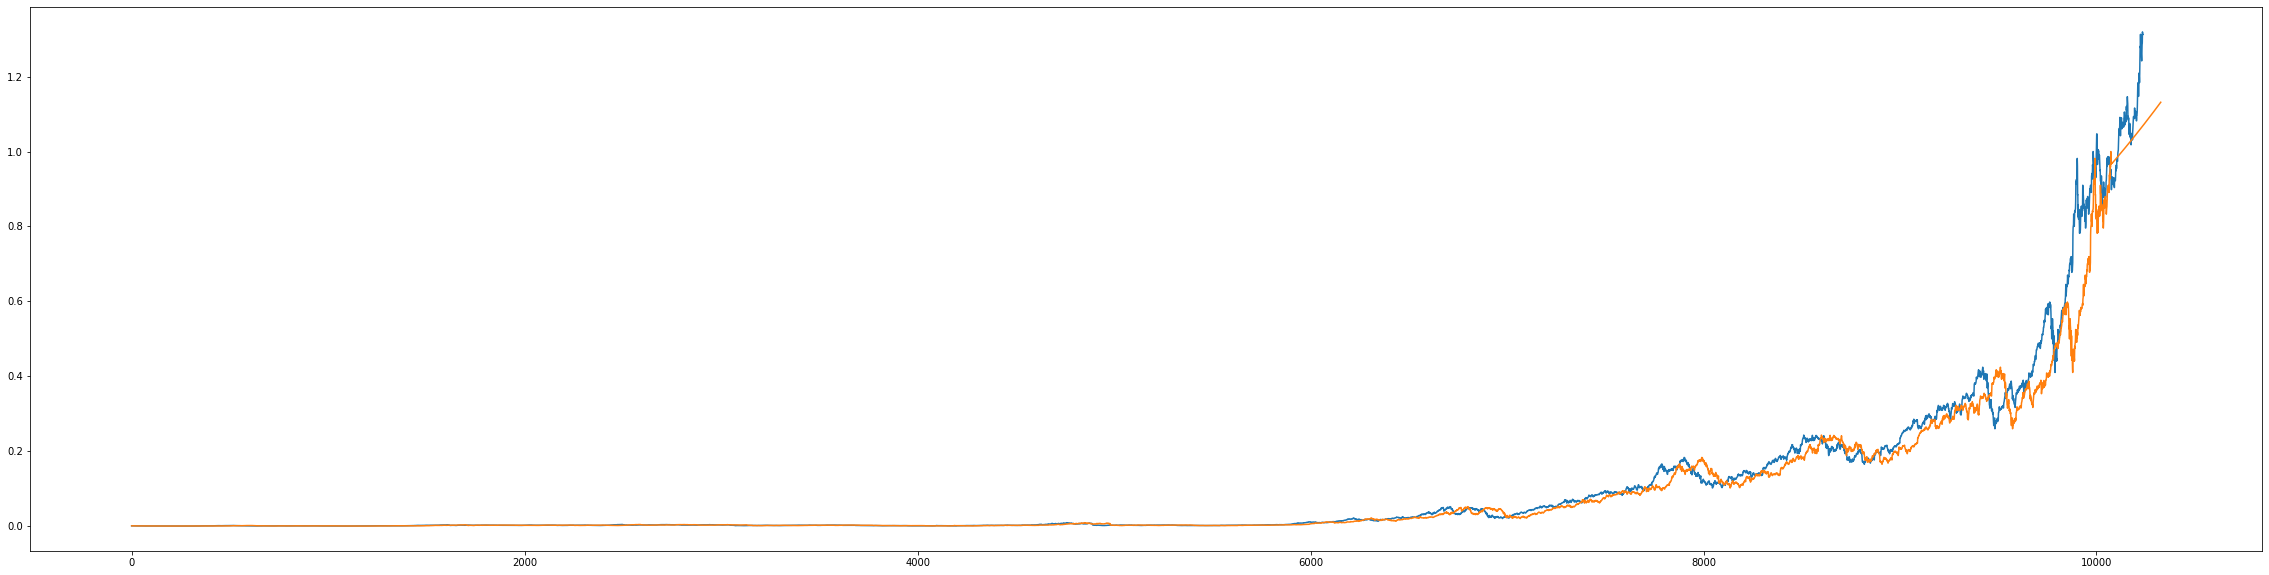

In [ ]:
stocksdata="AAPL"
dfc=yf.download(stocksdata,start="1981-1-1",end="2021-12-31")

dfc=dfc.reset_index()

df1c = dfc['Close']
from sklearn.preprocessing import MinMaxScaler
# scaler1=MinMaxScaler(feature_range=(0,1))
df1c=scaler.transform(np.array(df1c).reshape(-1,1))
def data_creater(dfc,a):
    rowc = [];
    YC = [];
    for i in range(len(dfc)-a-1):
        rowc.append(dfc[i:(i+a),0])
        YC.append(dfc[i+a,0])

    return np.array(rowc), np.array(YC)
a=100;
XC,YC = data_creater(df1c,a)
Y_trainc = YC[0:int(YC.shape[0])]
y_tc = scaler.inverse_transform(Y_trainc.reshape(1,-1))
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(40)
y_nv = scaler.inverse_transform(y_new.reshape(1,-1))
plt.plot(Y_trainc)
plt.plot(y_new)
plt.show()
